# The Analysis

Bitcoin is the preferred cryptocurrency that I have embraced in this Financial time series. Bitcoin remains the towering cryptocurrency in the market, having been the first to be invented thus assumes originality in investments. The strong point of invention of bitcoin has placed it in competitive edge assuming a -lead position as it features strong security status and also a wide network effect in the market. Bitcoin has a strong store value, thus also enabled it to leverage its position for many years. Such a competitive edge has enabled bitcoin prices to greatly influence other cryptocurrencies such as the bitcoin SV,ethereum, bitcoin cash, and XRP. This, therefore, implies the prices of the other cryptocurrencies affect the pricing values of bitcoin.
Bitcoin prices also depend on other events that perhaps are not quantified compared to other prices. Government policy, mining issues, demand, and supply of currencies are factors that have had a great deal of influence on bitcoin prices for years. Current events such as the changes in global oil prices, gold prices, and even trade wars, such as America and China's case, take a great position on influencing bitcoin prices. Breach of security protocols in financial systems can impact the pricing values of bitcoins. Amongst these factors influencing the pricing value of bitcoin, oil price changes can easily be obtained and used to quantify its effects on pricing. Events such as the changes in government policies, trade wars, mining issues, gold prices, and even the hacking of financial systems are never easy variables that can be obtained and used in quantifying its impact on the pricing value of the bitcoin.


In [3]:
import requests
import json
import pandas as pd
import datetime

In [2]:
pip install pandas

     |████████████████████████████████| 11.5 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 64.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
lim = '200'
pair = ['BTC','BSV','XLM','ETH','USDT','BCH','EOS','XRP','XTZ','DOGE','LTC']
coins = pd.DataFrame()

In [5]:
my_crypto_key = "903e8e246e9d8aab8459616c8843685efc31ecf75f36c29a8ee80bc74e1824b9"

In [6]:
for i in pair:
    URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym='+i+'&tsym=USD&limit='+lim+ '&api_key='
    URL = URL_A + my_crypto_key
    data = requests.get(URL)
    json_data = data.json()
    table = pd.json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    coins = pd.concat([coins, table.high], axis=1)
coins.columns = pair

In [7]:
coins.columns = pair
coins = coins[pair]
coins

,BTC,BSV,XLM,ETH,USDT,BCH,EOS,XRP,XTZ,DOGE,LTC
2021-01-21,35619.60,182.27,0.2947,1389.04,1.154,437.01,2.784,0.3081,2.932,0.009102,150.27
2021-01-22,33857.39,194.62,0.2815,1275.45,1.027,453.86,2.680,0.2784,3.113,0.008783,141.91
2021-01-23,33484.73,175.50,0.2792,1272.57,1.044,434.41,2.780,0.2839,3.398,0.008823,139.99
2021-01-24,33090.99,179.82,0.2831,1400.20,1.007,441.96,2.775,0.2780,3.295,0.008902,141.89
2021-01-25,34881.18,182.52,0.2776,1475.49,1.119,449.27,2.770,0.2852,3.181,0.008894,147.61
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,41409.14,149.49,0.2828,2844.03,1.013,550.69,4.218,0.7390,3.270,0.202300,145.15
2021-08-06,43363.62,150.67,0.2863,2949.04,1.012,560.94,4.353,0.7527,3.363,0.211900,150.90
2021-08-07,44731.51,163.44,0.3117,3172.52,1.004,590.47,4.650,0.8183,3.534,0.262800,156.45
2021-08-08,45310.33,152.78,0.3134,3190.38,1.034,578.09,4.665,0.8399,3.488,0.281900,157.64


In [8]:
coins_lagged=coins.copy()
trailing_window_size = 1
for window in range(1, trailing_window_size +1):
    shifted = coins.shift(window)
    shifted.columns = [x + "_lag" + str(window) for x in coins.columns]
    
    coins_lagged = pd.concat((coins_lagged, shifted), axis=1)
coins_lagged = coins_lagged.dropna()

In [9]:
coins_lagged

,BTC,BSV,XLM,ETH,USDT,BCH,EOS,XRP,XTZ,DOGE,...,BSV_lag1,XLM_lag1,ETH_lag1,USDT_lag1,BCH_lag1,EOS_lag1,XRP_lag1,XTZ_lag1,DOGE_lag1,LTC_lag1
2021-01-22,33857.39,194.62,0.2815,1275.45,1.027,453.86,2.680,0.2784,3.113,0.008783,...,182.27,0.2947,1389.04,1.154,437.01,2.784,0.3081,2.932,0.009102,150.27
2021-01-23,33484.73,175.50,0.2792,1272.57,1.044,434.41,2.780,0.2839,3.398,0.008823,...,194.62,0.2815,1275.45,1.027,453.86,2.680,0.2784,3.113,0.008783,141.91
2021-01-24,33090.99,179.82,0.2831,1400.20,1.007,441.96,2.775,0.2780,3.295,0.008902,...,175.50,0.2792,1272.57,1.044,434.41,2.780,0.2839,3.398,0.008823,139.99
2021-01-25,34881.18,182.52,0.2776,1475.49,1.119,449.27,2.770,0.2852,3.181,0.008894,...,179.82,0.2831,1400.20,1.007,441.96,2.775,0.2780,3.295,0.008902,141.89
2021-01-26,32943.69,183.78,0.2652,1378.06,1.015,442.22,2.674,0.2711,3.012,0.008477,...,182.52,0.2776,1475.49,1.119,449.27,2.770,0.2852,3.181,0.008894,147.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,41409.14,149.49,0.2828,2844.03,1.013,550.69,4.218,0.7390,3.270,0.202300,...,143.97,0.2840,2770.24,1.006,552.26,4.152,0.7394,3.188,0.203200,144.45
2021-08-06,43363.62,150.67,0.2863,2949.04,1.012,560.94,4.353,0.7527,3.363,0.211900,...,149.49,0.2828,2844.03,1.013,550.69,4.218,0.7390,3.270,0.202300,145.15
2021-08-07,44731.51,163.44,0.3117,3172.52,1.004,590.47,4.650,0.8183,3.534,0.262800,...,150.67,0.2863,2949.04,1.012,560.94,4.353,0.7527,3.363,0.211900,150.90
2021-08-08,45310.33,152.78,0.3134,3190.38,1.034,578.09,4.665,0.8399,3.488,0.281900,...,163.44,0.3117,3172.52,1.004,590.47,4.650,0.8183,3.534,0.262800,156.45


In [10]:
coins_lagged.to_csv('cryto_prices_data.csv', index_label='time')

In [11]:
df = pd.read_csv('cryto_prices_data.csv', index_col='time')

In [12]:
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()

In [14]:
pip install sklearn

     |████████████████████████████████| 22.3 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 49.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 67.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=51221d8d6fb569928a695f3f55711a73a27e4ecb57782136471fb87bf2cc1c6c
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 74.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 34.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)

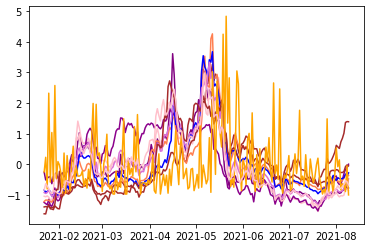

In [21]:
plt.plot(df_scaled.index, df_scaled['BSV'], color='purple')
plt.plot(df_scaled.index, df_scaled['XLM'], color='pink')
plt.plot(df_scaled.index, df_scaled['ETH'], color='brown')
plt.plot(df_scaled.index, df_scaled['BTC'], color='darkmagenta')
plt.plot(df_scaled.index, df_scaled['EOS'], color='coral')
plt.plot(df_scaled.index, df_scaled['BCH'], color='blue')
plt.plot(df_scaled.index, df_scaled['LTC'], color='orchid')
plt.plot(df_scaled.index, df_scaled['XRP'], color='brown')
plt.plot(df_scaled.index, df_scaled['USDT'], color='orange')
plt.plot(df_scaled.index, df_scaled['XTZ'], color='pink')

In [22]:
split = int(int(lim)/2)

In [23]:
Ytrain = pd.DataFrame(df_scaled[:split]['BTC'])
Ytest = pd.DataFrame(df_scaled[split:]['BTC'])

In [24]:
X = df_scaled[['BTC_lag1', 'BSV_lag1', 'ETH_lag1', 'XRP_lag1', 'USDT_lag1', 'BCH_lag1', 'LTC_lag1', 'XLM_lag1', 'XTZ_lag1', 'EOS_lag1','DOGE_lag1']]

In [25]:
from sklearn.linear_model import ElasticNet

In [26]:
en = ElasticNet(alpha=0.1, normalize=False)

In [27]:
t=en.fit(X[:split], Ytrain)
t

ElasticNet(alpha=0.1)

In [28]:
coef = list(en.coef_)
coef

[0.7986473915079265,
 0.0,
 0.0,
 0.0,
 -0.09539395709438034,
 0.0,
 0.0,
 0.0,
 0.037805560351809604,
 0.0,
 0.0]

In [29]:
count = 0
for i in X.columns:
    print(i, ':', coef[count])
    count = count + 1

BTC_lag1 : 0.7986473915079265
BSV_lag1 : 0.0
ETH_lag1 : 0.0
XRP_lag1 : 0.0
USDT_lag1 : -0.09539395709438034
BCH_lag1 : 0.0
LTC_lag1 : 0.0
XLM_lag1 : 0.0
XTZ_lag1 : 0.037805560351809604
EOS_lag1 : 0.0
DOGE_lag1 : 0.0


In [31]:
t.predict(X[:split])

array([-1.07643185, -0.8804454 , -0.94613842, -0.88386444, -1.03688649,
       -0.9239216 , -1.105056  , -0.85055538, -0.76848283, -0.77970351,
       -0.87473182, -0.83866926, -0.71045432, -0.51099657, -0.55158517,
       -0.45146538, -0.35781309, -0.40172162,  0.18852044,  0.24102301,
        0.12455493,  0.35103065,  0.3509646 ,  0.32018823,  0.4434153 ,
        0.37408493,  0.47938351,  0.68496694,  0.66205541,  0.99109309,
        1.02918727,  1.12077928,  0.92944945,  0.54156467,  0.50019677,
        0.3684675 ,  0.23599499,  0.22383955,  0.12527467,  0.45008309,
        0.39974265,  0.57342065,  0.43959763,  0.4016622 ,  0.40171454,
        0.5779102 ,  0.6838562 ,  0.88525589,  1.00598666,  1.11396241,
        1.08613043,  1.39099976,  1.29040474,  1.08711284,  1.02803731,
        1.1994559 ,  1.18318192,  1.17455183,  1.19946098,  1.11636114,
        0.95063629,  0.87924862,  0.82044556,  0.64145016,  0.88657688,
        0.97355728,  0.97225777,  1.12638872,  1.21625746,  1.23

In [32]:
BTC_Fitted = X.dot(coef)
BTC_Fitted

time
2021-01-22   -1.186730
2021-01-23   -0.990743
2021-01-24   -1.056436
2021-01-25   -0.994162
2021-01-26   -1.147184
                ...   
2021-08-05   -0.454014
2021-08-06   -0.356040
2021-08-07   -0.197156
2021-08-08   -0.064124
2021-08-09   -0.097721
Freq: D, Length: 200, dtype: float64

In [33]:
BTC_actual = df_scaled[['BTC']]
BTC_actual

,BTC
time,
2021-01-22,-1.240706
2021-01-23,-1.277518
2021-01-24,-1.316412
2021-01-25,-1.139575
2021-01-26,-1.330962
...,...
2021-08-05,-0.494737
2021-08-06,-0.301672
2021-08-07,-0.166551


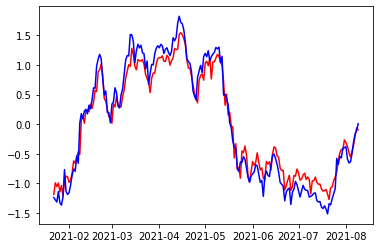

In [55]:
plt.plot(df_scaled.index, BTC_Fitted, color='red')
plt.plot(df_scaled.index, BTC_actual, color='blue')

In [35]:
# Actual vs Fitted values of BTC

In [36]:
y = BTC_actual
X = BTC_Fitted

In [37]:
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [38]:
sample_size = len(df_scaled)

In [41]:
pip install np

  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13652 sha256=37d06205bc9e2768e7bb8821da3d51b0fdea05132f71b5533f70d7be177d68f8
  Stored in directory: /home/jovyan/.cache/pip/wheels/8d/31/5b/f3f27c678f2b3ad7e29903ed09bb7446717fd4c8b35f53973a
Successfully built np
Note: you may need to restart the kernel to use updated packages.


In [42]:
squaredresidual = np.square(X-y)

In [43]:
import numpy as np

In [44]:
sum_squaredresidual = np.sum(squaredresidual)
sum_squaredresidual

8.179202621980062

In [45]:
MSE = sum_squaredresidual/sample_size
MSE

0.04089601310990031

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [47]:
X = df_scaled[['BSV_lag1']]

In [48]:
y = df_scaled['BTC']

In [49]:
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

[9.34414679e-17] [[0.7260287]]


In [52]:
forecast_BTC = lr.predict(X)

In [53]:
squared_residuals = np.square(forecast_BTC-y)

In [54]:
MSE = (np.sum(squared_residuals))/len(y)
MSE

0.47288232703064365